In [4]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load CLIP Baseline Data

# Figure 1: Baseline CLIP-HBA Behavioral Alignment

This notebook generates Figure 1, which visualizes the relationship between validation loss and behavioral alignment during CLIP-HBA fine-tuning on the baseline model.

## Import Libraries

In [5]:
# Load baseline CLIP results
baseline_seed1_csv = Path('../../Data/clip_results/baseline_clip_results_seed1.csv')

if baseline_seed1_csv.exists():
    baseline_seed1_df = pd.read_csv(baseline_seed1_csv)
    print(f"Baseline Seed 1 data loaded: {len(baseline_seed1_df)} epochs")
else:
    raise FileNotFoundError("Baseline Seed 1 data not found")

# Trim data at minimum test loss (early stopping point)
baseline_min_test_loss_idx = baseline_seed1_df['test_loss'].idxmin()
baseline_seed1_df = baseline_seed1_df.loc[:baseline_min_test_loss_idx].copy()

print(f"Data trimmed to {len(baseline_seed1_df)} epochs (up to minimum test loss)")
print(baseline_seed1_df.head())

Baseline Seed 1 data loaded: 118 epochs
Data trimmed to 98 epochs (up to minimum test loss)
   epoch  train_loss   test_loss  behavioral_rsa_rho  behavioral_rsa_p_value
0      1  143.198375  114.267337            0.455443            7.497325e-59
1      2   99.003030   91.310430            0.422459            4.797240e-50
2      3   88.155927   84.871568            0.421268            9.572966e-50
3      4   82.863315   80.375895            0.425018            1.076738e-50
4      5   78.583811   76.447118            0.440511            9.591843e-55


## Plot Behavioral Alignment vs Test Loss

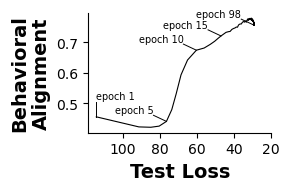

In [6]:
# Create plot showing behavioral alignment vs test loss
plt.figure(figsize=(3, 2))

# Plot the main trajectory
plt.plot(baseline_seed1_df['test_loss'], baseline_seed1_df['behavioral_rsa_rho'], 
         linewidth=0.8, color='black')

# Label specific epochs for reference
label_epochs = [1, 5, 10, 15, 98]
for i in range(len(baseline_seed1_df)):
    epoch = baseline_seed1_df['epoch'].iloc[i]
    if epoch in label_epochs:
        x = baseline_seed1_df['test_loss'].iloc[i]
        y = baseline_seed1_df['behavioral_rsa_rho'].iloc[i]
        
        # Position labels to avoid overlap
        if epoch == 1:
            label_x = x
            label_y = y + 0.05
            ha = 'left'
        else:
            label_x = x + 7
            label_y = y + 0.02
            ha = 'right'
        
        plt.text(label_x, label_y, f'epoch {epoch}', fontsize=7, ha=ha, va='bottom')
        plt.plot([x, label_x], [y, label_y], color='black', linewidth=0.7, zorder=2)

# Configure axes
ax = plt.gca()
ax.invert_xaxis()  # Lower loss to the right
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set x-axis ticks
xmin, xmax = ax.get_xlim()
xticks = np.arange(int(xmin // 20) * 20, int(xmax // 20) * 20 - 1, -20)
ax.set_xticks(xticks)

# Labels
plt.xlabel('Test Loss', fontweight='bold', fontsize=14)
plt.ylabel('Behavioral\nAlignment', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

## ViT Baseline Plotted

### Load ViT Baseline Data

In [23]:
rsa_csv = Path("../../Data/vit_results/rsa_results_final.csv")  # Local file in project directory

# Load data
merged = pd.read_csv(rsa_csv)

### Plot ViT Baseline: RSA vs Validation Loss

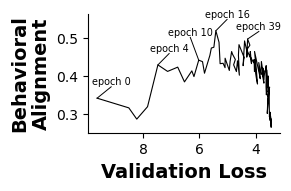

In [59]:
# Create plot showing behavioral alignment vs validation loss (matching CLIP style)
plt.figure(figsize=(3, 2))

# Sort by epoch to maintain trajectory order
merged_sorted = merged.sort_values('epoch')

# Plot the main trajectory
plt.plot(merged_sorted['val_loss'], merged_sorted['rsa_score'],
         linewidth=0.8, color='black')

# Label specific epochs for reference - fewer labels, better spacing
label_epochs = [0, 4, 10, 16, 39]
for _, row in merged_sorted.iterrows():
    epoch = int(row['epoch'])
    if epoch in label_epochs:
        x = row['val_loss']
        y = row['rsa_score']

        # Position labels above the line with consistent offset
        if epoch == 39:
            label_x = x - 0.4
            label_y = y + 0.02
            ha = 'center'
        elif epoch == 10:
            label_x = x + 0.3
            label_y = y + 0.06
            ha = 'center'
        elif epoch == 0:
            label_x = x - 0.5
            label_y = y + 0.03
            ha = 'center'
        else:
            label_x = x - 0.4
            label_y = y + 0.03
            ha = 'center'

        plt.text(label_x, label_y, f'epoch {epoch}', fontsize=7, ha=ha, va='bottom')
        plt.plot([x, label_x], [y, label_y], color='black', linewidth=0.7, zorder=2)

# Configure axes
ax = plt.gca()
ax.invert_xaxis()  # Lower loss to the right
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set x-axis ticks
xmin, xmax = ax.get_xlim()
xticks = np.arange(int(np.ceil(xmax)), int(np.floor(xmin)) + 1, 2)
ax.set_xticks(xticks)

# Labels
plt.xlabel('Validation Loss', fontweight='bold', fontsize=14)
plt.ylabel('Behavioral\nAlignment', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()